# 1. Project title: Computer Vision for Cassava Diseases Detection
Agricultural Capacity is one of the most important benchmarks for any thriving economy. As such, it is almost aways a high-investment activity. The investment made in agriculture acan be rendered void due to the acternal factors that may be beyond easy detection and control.

This project will aim to employ machine learning for task of predicting and detecting illness in cassava crop for the purpose of better and improved agrocultural profit


# 2. Methodology
This project will be carried out using the Cross Industry Standard Process for Data Mining (CRISP-DM) Methodology. This is one of the most popular data science methodologies and it's characterised by six important phases:
1. Business understanding,
2. Data understanding,
3. Data preparattion,
4. Data Modeling,
5. Model Evaluation, and
6. Model Deployment.

It should be noted that these phases are recurrent in nature (i.e. some phases may be repeated). As such, they do not necessarily follow a linear progression.

# 3. Tools
1. PIL
2. Matplotlib
3. Pytorch
4. TorchVsion
## 3.1 PIL
PIL (Python Image Library) is a Python library designed for the purpose of image loading and manipulation
## 3.2 Matplotlib
Matplotlib is a Python Library for data visualisation. Other alternatives are bokeh and plotly. They can also be used for visualising images.
## 3.3 Pytorch and TorchVision
Pytorch is C/C++ library (with a Python API) for machine learning and deep learning. It provides a lot of utilities and implementations for a lot of machine learning ideas such as neural network, normalisation layer, and others.
- Torchvision is a subset of PyTorch ecosytem with specific focus on images and computer vision.

# Project Implementation via CRIP-DM

# 01. Business Understanding
Novel Farm is a well known agricultural giant in the country, being top-notch providers of agricultural products via large-scale, commercial fsrmining. Their cassava plantation is presently under threath from diseases. At present, detecting and diagnosing these diseases requires the presence of agricultural experts. given that the plantation is very huge, this would either require (a.) a  few experts available around the clock, or (b.) multiple experts around for a short while. Either way, expenditure will be a major pain point.

Substituting with an ML model would make it such that they can be more easily monitor their casssava crops in real-time.This will be an immense boom to them in the follwing ways:
- provide a means of monitoring their cassava
- Make it easier to take quick action in the event of disease detection

# 2. Data Understanding

With the business understanding out of the way, the next step is  to understand the data to be obtained and used for the task. If dealing with regulartabular data, this would involve the process of Exploratory Data Analysis (EDA).

EDA is a process of sifting through data with the goal of extracting insights.  This inghsight allow a better understanding of the available data and what can be done with it. They can aslo be used for guided preparation of the dataset in the appropriate manner. Just like in the regular analysis, EDA begins with a set of questions and/or hypotheses. EDA will then prove or disprove these hypotheses, real other points of inquiryies along the way.

- However, in this instance, since the data is contain ed in images, this would require some visual assesment of the images. The result of the visualisation are outlined below:

In [ ]:
# Import Libraries
import os # To load the images into memory
from PIL import Image # For loading images
from matplotlib import pyplot as plt
import numpy as np

# Classes in the Dataset
We can figure out the classes in the dataset.

In [ ]:
import zipfile
import os

# Path to your ZIP file
data_path = "/content/drive/MyDrive/AMDARI projects/Cassava Diseases Detection/trainDataset.zip"

# Specify the directory where you want to extract the files
extract_path = "trainDataset"  # Example directory name for extraction

# Extract the ZIP file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the contents of the 'trainDataset' directory to display the classes
train_path = os.path.join(extract_path, 'train')  # Navigate to the 'trainDataset' directory
classes = os.listdir(train_path)  # List the directories inside 'train'
print("Classes in the dataset:", classes)


Classes in the dataset: ['cmd', 'cbsd', 'healthy', 'cbb', 'cgm']


# Observation
These classes map to:

1. Cassava Bacterial Blight (CBB),
2. Cassava Brown Steak Disease (CBSD),
3. Cassava Green Mite (CGM),
4. Cassava Mosaic Disease (CMD) and
5. Healthy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Class Distribution (i.e., Label Imbalance)¶

In [ ]:
import os

# Correct path to the extracted directory
extract_path = "trainDataset"  # Path where ZIP file was extracted
train_path = os.path.join(extract_path, 'train')  # Update to point to the 'train' directory

# List directories inside the 'train' directory to get class paths
data_paths = [(p, os.path.join(train_path, p)) for p in os.listdir(train_path)]

# Print the class paths
for class_name, path in data_paths:
    print(f"Class: {class_name}, Path: {path}")


Class: cmd, Path: trainDataset/train/cmd
Class: cbsd, Path: trainDataset/train/cbsd
Class: healthy, Path: trainDataset/train/healthy
Class: cbb, Path: trainDataset/train/cbb
Class: cgm, Path: trainDataset/train/cgm


In [ ]:
data_paths

[('cmd', 'trainDataset/train/cmd'),
 ('cbsd', 'trainDataset/train/cbsd'),
 ('healthy', 'trainDataset/train/healthy'),
 ('cbb', 'trainDataset/train/cbb'),
 ('cgm', 'trainDataset/train/cgm')]

In [ ]:
# Class distribution
count_dict = {
    a: len(os.listdir(b))
    for a, b in data_paths
}

In [ ]:
count_dict

{'cmd': 2658, 'cbsd': 1443, 'healthy': 316, 'cbb': 466, 'cgm': 773}

In [ ]:
import os

# Assuming train_path is already defined
count_dict = {
    a: len(os.listdir(b))
    for a, b in data_paths
}

# Display the class distribution
print("Class Distribution:")
for class_name, count in count_dict.items():
    print(f"{class_name}: {count} images")


Class Distribution:
cmd: 2658 images
cbsd: 1443 images
healthy: 316 images
cbb: 466 images
cgm: 773 images


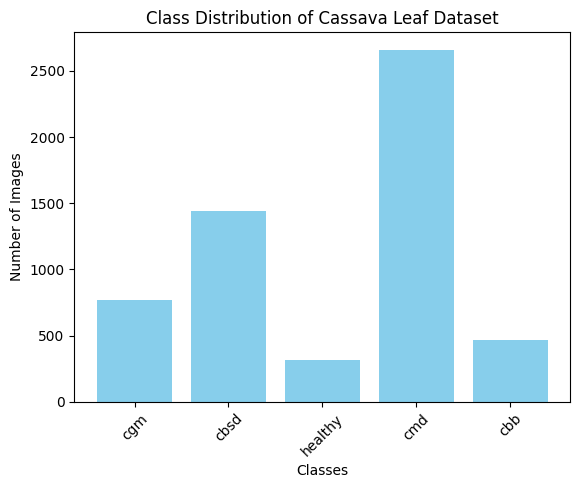

In [ ]:
import matplotlib.pyplot as plt

# Plot the class distribution
plt.bar(x=count_dict.keys(), height=count_dict.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of Cassava Leaf Dataset')
plt.xticks(rotation=45)
plt.show()
plt.close("all")


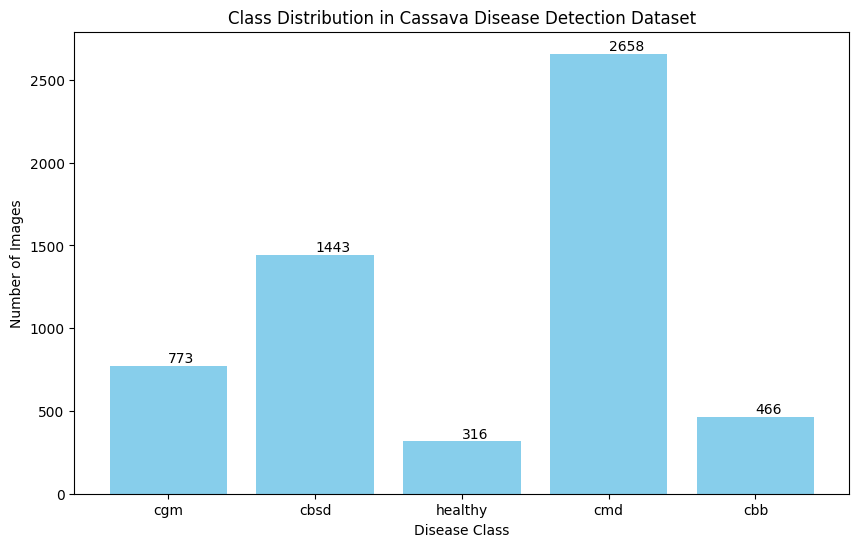

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
class_names = count_dict.keys()
class_counts = count_dict.values()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x=class_names, height=class_counts, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

# Add title and labels
plt.title('Class Distribution in Cassava Disease Detection Dataset')
plt.xlabel('Disease Class')
plt.ylabel('Number of Images')

# Show the plot
plt.show()
plt.close("all")


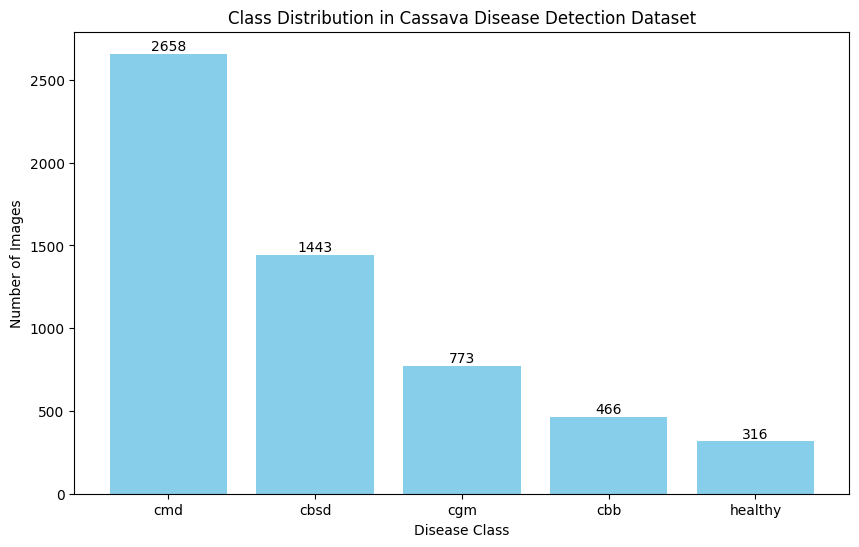

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
class_names = list(count_dict.keys())
class_counts = list(count_dict.values())

# Sort the data by count in descending order
sorted_indices = sorted(range(len(class_counts)), key=lambda i: class_counts[i], reverse=True)
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_class_counts = [class_counts[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(x=sorted_class_names, height=sorted_class_counts, color='skyblue')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Add title and labels
plt.title('Class Distribution in Cassava Disease Detection Dataset')
plt.xlabel('Disease Class')
plt.ylabel('Number of Images')

# Show the plot
plt.show()
plt.close("all")


# Image Sizes
In addition, we can explore the sizes of the images.

In [ ]:
import os
import numpy as np
from PIL import Image

# Sample images from the first class
sample_files = os.listdir(data_paths[0][-1])
sample_paths = [os.path.join(data_paths[0][-1], f) for f in sample_files]

In [ ]:
# Store image sizes
image_sizes = []

# Iterate through each sample image and get its size
for f in sample_paths:
    img = np.array(Image.open(f))  # Load image as numpy array
    image_sizes.append(img.shape)  # Get image dimensions (height, width, channels)

# Display unique image sizes
unique_sizes = set(image_sizes)
print("Unique Image Sizes in the First Class:")
unique_sizes

Unique Image Sizes in the First Class:


{(500, 499, 3),
 (500, 500, 3),
 (500, 501, 3),
 (500, 502, 3),
 (500, 503, 3),
 (500, 504, 3),
 (500, 505, 3),
 (500, 506, 3),
 (500, 507, 3),
 (500, 508, 3),
 (500, 509, 3),
 (500, 510, 3),
 (500, 511, 3),
 (500, 513, 3),
 (500, 514, 3),
 (500, 515, 3),
 (500, 516, 3),
 (500, 517, 3),
 (500, 518, 3),
 (500, 519, 3),
 (500, 520, 3),
 (500, 521, 3),
 (500, 522, 3),
 (500, 523, 3),
 (500, 524, 3),
 (500, 526, 3),
 (500, 527, 3),
 (500, 528, 3),
 (500, 529, 3),
 (500, 530, 3),
 (500, 532, 3),
 (500, 533, 3),
 (500, 534, 3),
 (500, 535, 3),
 (500, 537, 3),
 (500, 538, 3),
 (500, 539, 3),
 (500, 540, 3),
 (500, 541, 3),
 (500, 542, 3),
 (500, 543, 3),
 (500, 544, 3),
 (500, 545, 3),
 (500, 546, 3),
 (500, 547, 3),
 (500, 550, 3),
 (500, 551, 3),
 (500, 552, 3),
 (500, 554, 3),
 (500, 555, 3),
 (500, 556, 3),
 (500, 558, 3),
 (500, 559, 3),
 (500, 562, 3),
 (500, 563, 3),
 (500, 564, 3),
 (500, 565, 3),
 (500, 566, 3),
 (500, 567, 3),
 (500, 569, 3),
 (500, 571, 3),
 (500, 572, 3),
 (500, 5

In [ ]:
# List the first four image files from each class directory
sample_files = [os.listdir(p[-1])[:4] for p in data_paths]

# Generate the full paths for these sample images
sample_paths = list(map(lambda x, y: {x[0]: [os.path.join(x[1], y_) for y_ in y]}, data_paths, sample_files))

# Display the sample paths
sample_paths


[{'cmd': ['trainDataset/train/cmd/train-cmd-2059.jpg',
   'trainDataset/train/cmd/train-cmd-1216.jpg',
   'trainDataset/train/cmd/train-cmd-543.jpg',
   'trainDataset/train/cmd/train-cmd-165.jpg']},
 {'cbsd': ['trainDataset/train/cbsd/train-cbsd-986.jpg',
   'trainDataset/train/cbsd/train-cbsd-616.jpg',
   'trainDataset/train/cbsd/train-cbsd-799.jpg',
   'trainDataset/train/cbsd/train-cbsd-848.jpg']},
 {'healthy': ['trainDataset/train/healthy/train-healthy-200.jpg',
   'trainDataset/train/healthy/train-healthy-28.jpg',
   'trainDataset/train/healthy/train-healthy-79.jpg',
   'trainDataset/train/healthy/train-healthy-189.jpg']},
 {'cbb': ['trainDataset/train/cbb/train-cbb-338.jpg',
   'trainDataset/train/cbb/train-cbb-286.jpg',
   'trainDataset/train/cbb/train-cbb-35.jpg',
   'trainDataset/train/cbb/train-cbb-383.jpg']},
 {'cgm': ['trainDataset/train/cgm/train-cgm-167.jpg',
   'trainDataset/train/cgm/train-cgm-354.jpg',
   'trainDataset/train/cgm/train-cgm-146.jpg',
   'trainDataset/tra

In [ ]:
samples = dict()

for (x, y), f in zip(data_paths, sample_files):
    samples[x] = [os.path.join(y, y_) for y_ in f]
samples

{'cmd': ['trainDataset/train/cmd/train-cmd-2059.jpg',
  'trainDataset/train/cmd/train-cmd-1216.jpg',
  'trainDataset/train/cmd/train-cmd-543.jpg',
  'trainDataset/train/cmd/train-cmd-165.jpg'],
 'cbsd': ['trainDataset/train/cbsd/train-cbsd-986.jpg',
  'trainDataset/train/cbsd/train-cbsd-616.jpg',
  'trainDataset/train/cbsd/train-cbsd-799.jpg',
  'trainDataset/train/cbsd/train-cbsd-848.jpg'],
 'healthy': ['trainDataset/train/healthy/train-healthy-200.jpg',
  'trainDataset/train/healthy/train-healthy-28.jpg',
  'trainDataset/train/healthy/train-healthy-79.jpg',
  'trainDataset/train/healthy/train-healthy-189.jpg'],
 'cbb': ['trainDataset/train/cbb/train-cbb-338.jpg',
  'trainDataset/train/cbb/train-cbb-286.jpg',
  'trainDataset/train/cbb/train-cbb-35.jpg',
  'trainDataset/train/cbb/train-cbb-383.jpg'],
 'cgm': ['trainDataset/train/cgm/train-cgm-167.jpg',
  'trainDataset/train/cgm/train-cgm-354.jpg',
  'trainDataset/train/cgm/train-cgm-146.jpg',
  'trainDataset/train/cgm/train-cgm-648.jpg

In [ ]:
samples = dict()

# Populate the dictionary with class names and their corresponding sample image paths
for (class_name, class_path), sample_files in zip(data_paths, sample_files):
    samples[class_name] = [os.path.join(class_path, sample_file) for sample_file in sample_files]

# Display the dictionary of sample image paths
samples


{'cmd': ['trainDataset/train/cmd/train-cmd-2059.jpg',
  'trainDataset/train/cmd/train-cmd-1216.jpg',
  'trainDataset/train/cmd/train-cmd-543.jpg',
  'trainDataset/train/cmd/train-cmd-165.jpg'],
 'cbsd': ['trainDataset/train/cbsd/train-cbsd-986.jpg',
  'trainDataset/train/cbsd/train-cbsd-616.jpg',
  'trainDataset/train/cbsd/train-cbsd-799.jpg',
  'trainDataset/train/cbsd/train-cbsd-848.jpg'],
 'healthy': ['trainDataset/train/healthy/train-healthy-200.jpg',
  'trainDataset/train/healthy/train-healthy-28.jpg',
  'trainDataset/train/healthy/train-healthy-79.jpg',
  'trainDataset/train/healthy/train-healthy-189.jpg'],
 'cbb': ['trainDataset/train/cbb/train-cbb-338.jpg',
  'trainDataset/train/cbb/train-cbb-286.jpg',
  'trainDataset/train/cbb/train-cbb-35.jpg',
  'trainDataset/train/cbb/train-cbb-383.jpg'],
 'cgm': ['trainDataset/train/cgm/train-cgm-167.jpg',
  'trainDataset/train/cgm/train-cgm-354.jpg',
  'trainDataset/train/cgm/train-cgm-146.jpg',
  'trainDataset/train/cgm/train-cgm-648.jpg

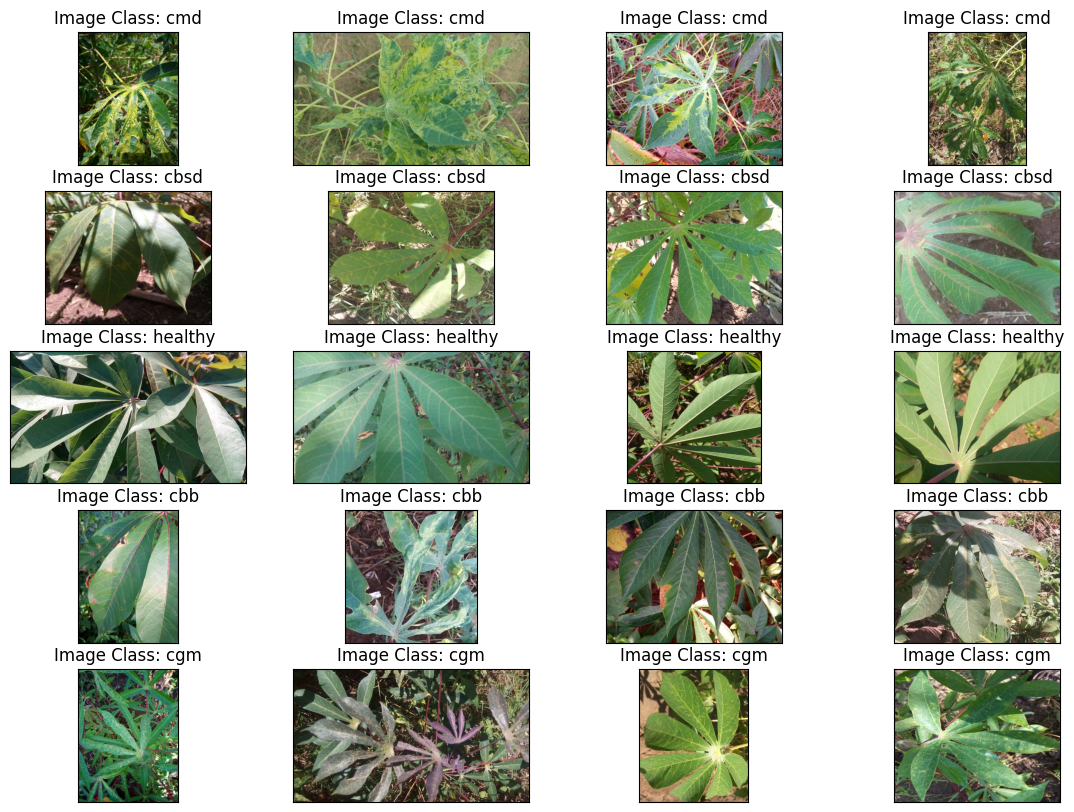

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Create a grid of subplots
fig, axs = plt.subplots(len(samples), 4, figsize = (14, 10))
i = 0
j = 0

# Iterate through each class and its sample images
for class_, imgs in samples.items():
    for img in imgs:
        img = Image.open(img)
        axs[i, j].imshow(img)
        axs[i, j].set_title("Image Class: " + class_)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

        j+=1

    j = 0
    i += 1

plt.show(); plt.close("all")

# Observations
- There are five categories of cassava images.

1. The images are generally large in size. This would imply that a lot of computation will take place.

2. The sizes of the images vary. This would require us to ensure that the images are of the same size.

3. The image classes are imbalanced. This might require the use of specialized metrics for evaluation, such as ROC AUC.

# 2.3. Data Implications
Implied by our findings above, we can say the following:

1. Large size: The images in the dataset are large in size.

2. Varying size: Apart from magnitude in size, the images also vary in size.

3. Label imbalance: The images are not uniformly distributed with respect to their classes.

# 03. Data Preparation

Based on the Data Implications discovered prior, the following steps will be experimented upon for the data preparation stage.

1. Image Resizing: Due to the large, varying sizes of the images, a standardized size will be enforced.

2. Label Balancing: The label imbalance might require the use of specialized metrics for evaluation, such as ROC AUC. We can also bypass this issue by everaging pretrained models.

3. Pretrained Models: To minimize learning-related computation, pretrained vision models will be leveraged.

High-level steps for Data Preparation:

1. Import libraries.

2. Set computation device.

3. Implement Dataset class.

4. Load images into memory via Dataset class.

5. Split Dataset into train and test splits.

6. Generate DataLoaders from Datasets.

In [ ]:
import torch

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms as T

from random import shuffle

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
# Set computational device as either CPU or GPU (i.e., CUDA)
DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
DEVICE

device(type='cuda')

Now, we implement the Dataset class. This class need three main methods:

__ init __

__ getitem __ and

__ len __

In [ ]:
import os
from random import shuffle
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms as T

class CassavaDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        # Set default transformations if none are provided
        if transform is None:
            transform = T.Compose(
                [
                    T.Resize((224, 224)),  # Resize images
                    T.ToTensor(),  # Convert images to PyTorch tensors
                    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize images
                ]
            )
        self.transform = transform

        # List all class directories
        classes = os.listdir(path)
        # Create class-to-index mapping
        self.class_map = dict(zip(classes, range(len(classes))))

        # Initialize empty file list
        self.files = []

        # Collect all image file paths and their corresponding class labels
        for class_ in classes:  # Iterate over classes
            # Full path to the class directory
            class_dir = os.path.join(path, class_)
            # Get class files
            class_files = os.listdir(class_dir)
            # Append full file paths and labels
            self.files += [
                (os.path.join(class_dir, f), class_) for f in class_files
            ]

        # Shuffle the file list to randomize the data order
        shuffle(self.files)

    def __len__(self):
        """Returns the total number of samples in dataset"""
        return len(self.files)

    def __getitem__(self, index):
        img, class_ = self.files[index]
        img = Image.open(img)

        # Apply the transformations and return the image and its corresponding label
        return self.transform(img), self.class_map[class_]

In [ ]:
# Instantiate Dataset object
dataset = CassavaDataset(path='trainDataset/train')

# List all files in the dataset
dataset.files

[('trainDataset/train/cbsd/train-cbsd-748.jpg', 'cbsd'),
 ('trainDataset/train/cgm/train-cgm-56.jpg', 'cgm'),
 ('trainDataset/train/cmd/train-cmd-1191.jpg', 'cmd'),
 ('trainDataset/train/cmd/train-cmd-913.jpg', 'cmd'),
 ('trainDataset/train/cbsd/train-cbsd-1376.jpg', 'cbsd'),
 ('trainDataset/train/cmd/train-cmd-1392.jpg', 'cmd'),
 ('trainDataset/train/cgm/train-cgm-20.jpg', 'cgm'),
 ('trainDataset/train/cmd/train-cmd-2434.jpg', 'cmd'),
 ('trainDataset/train/cbsd/train-cbsd-302.jpg', 'cbsd'),
 ('trainDataset/train/cmd/train-cmd-2350.jpg', 'cmd'),
 ('trainDataset/train/cbsd/train-cbsd-1354.jpg', 'cbsd'),
 ('trainDataset/train/cmd/train-cmd-1568.jpg', 'cmd'),
 ('trainDataset/train/cgm/train-cgm-463.jpg', 'cgm'),
 ('trainDataset/train/cmd/train-cmd-2241.jpg', 'cmd'),
 ('trainDataset/train/cmd/train-cmd-70.jpg', 'cmd'),
 ('trainDataset/train/cbsd/train-cbsd-712.jpg', 'cbsd'),
 ('trainDataset/train/cmd/train-cmd-297.jpg', 'cmd'),
 ('trainDataset/train/cmd/train-cmd-390.jpg', 'cmd'),
 ('train

In [ ]:
len(dataset)

5656

In [ ]:
from torch.utils.data import random_split

# Split dataset into train and test splits
train_ds, test_ds = random_split(dataset = dataset, lengths = [.7, .3])

In [ ]:
len(train_ds)

3960

In [ ]:
len(test_ds)

1696

# train_size = 70% for training
#test_size =  Remaining 30% for testing

In [ ]:
BATCH_SIZE = 16

In [ ]:
# Generate DataLoaders
train_dl, test_dl = (
    DataLoader(dataset = train_ds, batch_size = BATCH_SIZE, shuffle = True),
    DataLoader(dataset = test_ds, batch_size = BATCH_SIZE, shuffle = True)
)

# 04. Data Modelling
High-level steps for Data Modeling:

1. Load pretrained model: Begin by loading a pretrained model to leverage existing knowledge and improve training efficiency.

2. Reconfigure pretrained model: Adapt the pretrained model to suit the specific requirements of the project.

- Resnet-18: Configure the ResNet-18 model for feature extraction and classification tasks. A variant of the ResNet (Residual Networks) architecture with 18 layers, designed to handle deeper networks by using residual connections to prevent vanishing gradient problems.

- VGG-13: Configure the VGG-13 model for similar purposes, depending on performance and suitability. A variant of the VGG (Visual Geometry Group) architecture  with 13 layers, slightly less deep than VGG16.

3. Initialize model weights: Set up initial weights for the model to start the training process.

4. Instantiate training utilities: Set up the necessary tools for training, such as optimizers and loss functions.

5. Write training loop: Develop the loop that will handle the training process, including forward and backward passes.

6. Train model: Execute the training loop to optimize the model parameters based on the dataset.

In [ ]:
from torchvision.models import resnet18, vgg13
from sklearn.metrics import accuracy_score

In [ ]:
def generate_model(out_features, freeze_weights = True, model_function = resnet18):
    base_model = model_function(weights = True)

    if freeze_weights:
        for param in base_model.parameters():
            param.requires_grad_(False)

    try:
        in_features = base_model.fc.in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.fc = new_layer
    except:
        in_features = base_model.classifier[0].in_features
        new_layer = nn.Linear(in_features, out_features)
        base_model.classifier = new_layer

    return base_model

In [ ]:
def generate_model(out_features, freeze_weights=True, model_function=resnet18):
    """
    Generates a deep learning model with a modified output layer.

    Parameters:
    - out_features (int): The number of output features for the model (e.g., number of classes).
    - freeze_weights (bool): If True, freezes the weights of the pre-trained model. Default is True.
    - model_function (callable): The function to create the base model. Default is resnet18.

    Returns:
    - base_model (nn.Module): The modified model ready for training.
    """

    # Initialize the base model using the provided model function (e.g., resnet18) with pre-trained weights
    base_model = model_function(weights=True)

    # If freeze_weights is True, disable training for all parameters in the base model
    if freeze_weights:
        for param in base_model.parameters():
            param.requires_grad_(False)

    # Try to replace the fully connected layer (fc) for models like ResNet
    try:
        # Get the number of input features to the original fully connected layer
        in_features = base_model.fc.in_features

        # Create a new fully connected layer with the desired number of output features
        new_layer = nn.Linear(in_features, out_features)

        # Replace the old fully connected layer with the new one
        base_model.fc = new_layer

    # If the model does not have an fc attribute, handle cases like VGG models that use 'classifier'
    except:
        # Get the number of input features to the first layer of the classifier
        in_features = base_model.classifier[0].in_features

        # Create a new fully connected layer with the desired number of output features
        new_layer = nn.Linear(in_features, out_features)

        # Replace the classifier's first layer with the new fully connected layer
        base_model.classifier = new_layer

    # Return the modified model
    return base_model


In [ ]:
# Import necessary PyTorch modules
from torch import nn  # nn contains the modules needed for defining neural networks

# Define a custom model class
class Model(nn.Module):  # Inherit from nn.Module, the base class for all neural network modules in PyTorch
    def __init__(self, out_features, freeze_weights=True, model_function=resnet18):
        super().__init__()  # Call the parent class constructor to initialize the nn.Module

        # Generate the base model using a predefined function
        self.base = generate_model(
            out_features=out_features,
            freeze_weights=freeze_weights,
            model_function=model_function
        )

    # Define the forward pass of the model
    def forward(self, x):
        # Pass input 'x' through the base model
        x = self.base(x)

        # Apply log softmax to the output to ensure proper probability distribution
        return torch.log_softmax(x, dim=-1)


In [ ]:
# Training hyperparameters
EPOCHS = 20
LR = 1e-3
criterion = nn.CrossEntropyLoss()

NUM_CLASSES = len(dataset.class_map) # Number of data catagories

# Optimizer hyperparameters
FACTOR = 10
AMSGRAD = False
BETAS = (.9, .999)

In [ ]:
# Training hyperparameters
EPOCHS = 20  # Number of training epochs
LR = 1e-3  # Learning rate for the optimizer
criterion = nn.CrossEntropyLoss()  # Loss function for classification tasks

# Ensure 'dataset' is defined before using it
NUM_CLASSES = len(dataset.class_map)  # Number of data categories

# Optimizer hyperparameters
FACTOR = 10  # Factor by which learning rate is reduced
AMSGRAD = False  # Boolean to decide whether to use AMSGrad variant of the optimizer
BETAS = (0.9, 0.999)  # Coefficients used for computing running averages of gradient and its square


The initialize_model_weights function is designed to initialize the weights of a neural network model using a specified initialization function. The purpose of weight initialization is to set the starting weights of the neural network in a way that promotes efficient learning. Let's go through the code step-by-step:

In [ ]:
def initialize_model_weights(model, init_func=nn.init.normal_):
    """
    Initialize the weights of a model's layers using the specified initialization function.

    Parameters:
    model (torch.nn.Module): The model whose weights need to be initialized.
    init_func (callable): The initialization function to apply to the model's weights. Defaults to normal distribution.

    Returns:
    model (torch.nn.Module): The model with initialized weights.
    """

    # Iterate through all named parameters of the model
    for name, params in model.named_parameters():
        # Check if the layer name is either 'fc' (fully connected) or 'classifier'
        if name in ["fc", "classifier"]:
            # Apply the specified initialization function to these layers
            init_func(params)
        else:
            # Skip other layers
            continue

    # Return the model with initialized weights
    return model

The training_loop function is designed to train a machine learning model using PyTorch. It iterates over multiple epochs, performing training and evaluation on each pass.

# Epochs in Machine Learning
Epochs refer to the number of complete passes through the entire training dataset during the training process of a machine learning model. In simpler terms, an epoch is one full cycle through all the training data once.

# Detailed Explanation
Training Process: When training a machine learning model, especially neural networks, data is typically divided into smaller batches due to computational constraints. The model updates its weights (parameters) after processing each batch. An epoch is completed once the model has iterated through all these batches that together cover the entire dataset.

# Why Use Multiple Epochs?:

Training a model on the dataset for just one epoch is often insufficient to learn complex patterns, as it might not fully capture the underlying relationships in the data. Multiple epochs allow the model to learn gradually and improve its performance by repeatedly adjusting its weights based on feedback from the data.

Each epoch allows the model to refine its understanding of the data, correct errors, and reduce loss (the difference between predicted and actual values).

# Convergence and Generalization:

During training, the model gradually reduces the loss and improves its predictions with each epoch. This process is called convergence.
However, using too many epochs can lead to overfitting, where the model learns the training data too well (including noise and minor details), which negatively impacts its performance on unseen data. Conversely, too few epochs may lead to underfitting, where the model hasn't learned enough from the data.

# Example
If you have a dataset of 1,000 images and a batch size of 100, one epoch consists of 10 iterations (1,000 images / 100 images per batch). After 10 iterations, the model has seen the entire dataset once. If you train the model for 5 epochs, it means the model will pass through the entire dataset 5 times.

# Key Points
Epoch: One complete pass through the entire training dataset.
Iterations: Number of batches processed to complete one epoch.
Learning: More epochs generally improve model learning, but with diminishing returns and a risk of overfitting.
In summary, epochs are a critical hyperparameter in training neural networks and other machine learning models, balancing between learning efficiency and the risk of overfitting.

In [ ]:
def training_loop(epochs, model, optimizer):
    """
    Training loop function to train a model over a specified number of epochs.

    Parameters:
    epochs (int): Number of epochs to train the model.
    model (torch.nn.Module): The PyTorch model to be trained.
    optimizer (torch.optim.Optimizer): The optimizer used for model training.

    Returns:
    dict: A dictionary containing training and testing losses, accuracies, and the trained model.
    """
    # Initialize lists to store training and testing losses and accuracies
    TRAIN_LOSSES, TEST_LOSSES = [], []
    TRAIN_ACCS, TEST_ACCS = [], []

    # Loop over the specified number of epochs
    for epoch in range(epochs):
        # Initialize lists to store losses and accuracies for each epoch
        train_losses, test_losses = [], []
        train_accs, test_accs = [], []

        # Set model to training mode
        model.train()

        # Training phase
        for X, y in iter(train_dl):
            # Move input and output data to the specified device (CPU or GPU)
            X, y = X.to(DEVICE), y.to(DEVICE)

            # Forward pass: compute model predictions
            y_pred = model(X.to(DEVICE))
            # Compute loss using the specified criterion
            train_loss = criterion(y_pred, y)
            # Backward pass: compute gradients
            train_loss.backward()
            # Update model parameters
            optimizer.step()
            # Reset gradients to zero
            optimizer.zero_grad()

            # Append current batch loss
            train_losses.append(train_loss.item())

            # Calculate accuracy for the current batch
            train_acc = accuracy_score(y.cpu().numpy(), y_pred.max(dim=-1).indices.cpu().numpy())
            train_accs.append(train_acc)

        # Evaluation phase: disable gradient calculation for efficiency
        with torch.no_grad():
            # Set model to evaluation mode
            model.eval()
            # Loop over test data
            for X_, y_ in iter(test_dl):
                # Move test data to the specified device
                X_, y_ = X_.to(DEVICE), y_.to(DEVICE)
                # Compute model predictions
                y_p = model(X_)
                # Compute test loss
                test_loss = criterion(y_p, y_)

                # Append current test batch loss
                test_losses.append(test_loss.item())

                # Calculate accuracy for the current test batch
                test_acc = accuracy_score(y_.cpu().numpy(), y_p.max(dim=-1).indices.cpu().numpy())
                test_accs.append(test_acc)

        # Calculate average losses and accuracies for the epoch
        avg_train_loss = sum(train_losses) / len(train_losses)
        avg_test_loss = sum(test_losses) / len(test_losses)
        avg_train_acc = sum(train_accs) / len(train_accs)
        avg_test_acc = sum(test_accs) / len(test_accs)

        # Print training progress
        print(
            f"Epoch: {epoch+1} | Train loss: {avg_train_loss: .3f} | Test loss: {avg_test_loss: .3f} |",
            f"Train accuracy: {avg_train_acc: .3f} | Test accuracy: {avg_test_acc: .3f}"
        )

        # Store average losses and accuracies for each epoch
        TRAIN_LOSSES.append(avg_train_loss)
        TEST_LOSSES.append(avg_test_loss)
        TRAIN_ACCS.append(avg_train_acc)
        TEST_ACCS.append(avg_test_acc)

    # Clear CUDA cache to free up memory
    torch.cuda.empty_cache()
    torch.clear_autocast_cache()

    # Return the results as a dictionary
    return {
        "loss": [TRAIN_LOSSES, TEST_LOSSES],
        "accuracy": [TRAIN_ACCS, TEST_ACCS],
        "model": model
    }


# VGG-13
1. Finetuning
2. Frozen Weights

In [ ]:
# Initialize the VGG-13 model for multi-class classification with weight fine-tuning
vgg_model = Model(
    out_features = NUM_CLASSES,    # Set the number of output classes for the task
    freeze_weights = False,        # Allow all model weights to be fine-tuned
    model_function = vgg13         # Use the VGG-13 architecture as the base model
).to(DEVICE)                       # Transfer the model to the specified device (e.g., GPU or CPU)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG13_Weights.IMAGENET1K_V1`. You can also use `weights=VGG13_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg13-19584684.pth" to /root/.cache/torch/hub/checkpoints/vgg13-19584684.pth
100%|██████████| 508M/508M [00:08<00:00, 63.0MB/s]


# VGG-13 model with weight fine-tuning for a multi-class classification task. Let's break it down:

#Explanation
VGG-13 Model: VGG-13 is a specific version of the VGG (Visual Geometry Group) neural network architecture, which is known for its deep convolutional layers. It's commonly used for image classification tasks due to its simplicity and high accuracy.

Weight Fine-Tuning: Fine-tuning is the process of training an already pretrained model on a new dataset. Here, by setting freeze_weights = False, we allow all layers in the network to be updated during the training. This is useful when the target dataset has significant differences from the dataset on which the model was originally pretrained.

#Summary
By running this code, the VGG-13 model is set up for a new classification task where all layers are trainable, allowing the model to learn new patterns specific to the new dataset. This approach is useful when adapting a pretrained model to a new, potentially different domain.



In [ ]:
# Initialize model weights using normal distribution initialization
vgg_model = initialize_model_weights(
    vgg_model,                      # The VGG-13 model instance to be initialized
    init_func = nn.init.normal_     # Weight initialization function (Normal distribution)
)


# Explanation
# Weight Initialization:

Weight initialization is crucial in training deep neural networks. It sets the starting weights of the model in a way that can significantly affect the model's convergence speed and final performance.
nn.init.normal_: This is a PyTorch function used to initialize weights with values drawn from a normal (Gaussian) distribution. The mean is 0, and the standard deviation is 1 by default.

# What This Does
The initialize_model_weights function iterates through the model's parameters and applies the specified initialization function (nn.init.normal_ in this case) to set the initial weights. This is particularly useful for layers like fully connected or convolutional layers where starting weights can impact learning.

# Summary
By initializing the model weights with values drawn from a normal distribution, we provide a starting point for the learning algorithm that can help in achieving faster convergence and avoiding issues like vanishing or exploding gradients during training.
# NOTE:
Weight initialization will only be applied to the new layers added. This will allow us retain the pretrained weights.

In [ ]:
# Initialize Adam optimizer with model-specific parameters and hyperparameters
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),  # Fine-tune the classifier layer of VGG-13
            "lr": LR  # Learning rate for the classifier
        }
    ],
    lr = LR/FACTOR,  # Lower learning rate for other layers
    amsgrad = AMSGRAD,  # Use AMSGrad variant if set to True
    betas=BETAS  # Coefficients for running averages of gradient and its square
)

# Adam Optimizer (Adaptive Moment Estimation optimizer):

The Adam (Adaptive Moment Estimation) optimizer is an optimization algorithm that adjusts the learning rate of each parameter adaptively based on estimates of first and second moments of the gradients. It is often used in training deep learning models due to its efficiency and effectiveness in handling sparse gradients.

# What This Does
- Fine-Tuning the Classifier Layer: The optimizer is set up to specifically fine-tune the classifier layer of the VGG-13 model using a higher learning rate (LR), while the rest of the model uses a lower learning rate (LR/FACTOR). This is useful when leveraging pretrained models, where the earlier layers are often kept frozen or trained with a smaller learning rate to preserve learned features.

- Control Over Gradient Updates: By setting amsgrad and betas, the code provides control over the behavior of the optimizer to enhance convergence stability and speed.

# Summary
This setup allows the model to adaptively adjust its learning rates while emphasizing fine-tuning on specific parts of the model (i.e., the classifier layer). This approach is beneficial when using transfer learning, where only a part of the model is trained, keeping the rest mostly intact to retain previously learned knowledge.

In [ ]:
# Train VGG-13 via fine-tuning
vgg_finetuned = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)

Epoch: 1 | Train loss:  1.282 | Test loss:  1.286 | Train accuracy:  0.659 | Test accuracy:  0.721
Epoch: 2 | Train loss:  0.264 | Test loss:  1.432 | Train accuracy:  0.929 | Test accuracy:  0.681
Epoch: 3 | Train loss:  0.128 | Test loss:  1.467 | Train accuracy:  0.981 | Test accuracy:  0.729
Epoch: 4 | Train loss:  0.103 | Test loss:  1.366 | Train accuracy:  0.992 | Test accuracy:  0.739
Epoch: 5 | Train loss:  0.118 | Test loss:  1.590 | Train accuracy:  0.994 | Test accuracy:  0.732
Epoch: 6 | Train loss:  0.111 | Test loss:  1.361 | Train accuracy:  0.992 | Test accuracy:  0.735
Epoch: 7 | Train loss:  0.106 | Test loss:  1.521 | Train accuracy:  0.995 | Test accuracy:  0.733
Epoch: 8 | Train loss:  0.126 | Test loss:  1.847 | Train accuracy:  0.993 | Test accuracy:  0.692
Epoch: 9 | Train loss:  0.161 | Test loss:  1.893 | Train accuracy:  0.985 | Test accuracy:  0.722
Epoch: 10 | Train loss:  0.147 | Test loss:  1.912 | Train accuracy:  0.978 | Test accuracy:  0.726
Epoch: 11

In [ ]:
# Run this in a code cell to monitor GPU usage
!nvidia-smi


Tue Sep  3 02:42:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0              33W /  70W |   1091MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Initialize VGG-13 Model with Frozen Weights
vgg_model = Model(
    out_features = NUM_CLASSES,    # Specify the number of output classes for classification
    freeze_weights = True,         # Freeze the weights of the VGG-13 model to prevent them from being updated during training
    model_function = vgg13         # Use the VGG-13 architecture as the base model for feature extraction
).to(DEVICE)                       # Move the model to the specified device (e.g., GPU) to utilize its computational power

# Explanation:
# This code sets up the VGG-13 neural network model with pre-trained weights. By freezing the weights (freeze_weights = True),
# the model will use the existing features learned from the ImageNet dataset and will not update them during training.
# This approach allows the model to serve as a feature extractor, making it useful for transfer learning on a new dataset.
# The model is then moved to the designated device (like a GPU) for faster computation.


In [ ]:
# Initialize the Adam Optimizer for Training the VGG-13 Model
opt = optim.Adam(
    params = [
        {
            "params": vgg_model.base.classifier.parameters(),  # Specify the parameters of the classifier (final layers) of the VGG-13 model
            "lr": LR  # Set the learning rate for these parameters
        }
    ],
    lr = LR/FACTOR,   # Set the global learning rate for all parameters, divided by a factor to control the rate of updates
    amsgrad = AMSGRAD,  # Use the AMSGrad variant of the Adam optimizer if enabled; helps in preventing a very high learning rate
    betas = BETAS  # Coefficients used for computing running averages of gradient and its square (typically (0.9, 0.999))
)

# Explanation:
- This code initializes the Adam optimizer for fine-tuning the VGG-13 model.
- The Adam optimizer is chosen because it adapts the learning rate of each parameter, which can lead to faster convergence.

- The optimizer is configured to update only the parameters of the VGG-13 model's classifier (the final fully connected layers) since the model is being used with frozen weights for feature extraction. This means only the classifier's weights are rainable, and the rest of the model remains unchanged.

- 'lr': Specifies the learning rate for the classifier layers. A higher learning rate is assigned to these layers to allow faster adaptation to the new dataset.
- 'lr/FACTOR': Sets a smaller global learning rate for any other parameters that might be unfrozen (though here it's only for the classifier).
- 'amsgrad': A boolean flag to use the AMSGrad variant of Adam, which can help in situations where the standard Adam optimizer fails to converge properly.
- 'betas': The beta values for the exponential decay rates of the first and second moment estimates, which control how much of the past gradients' information is retained. This helps balance between stability and convergence speed.

In [ ]:
# Train VGG-13 using Frozen Weights
vgg_frozen = training_loop(model = vgg_model, optimizer = opt, epochs = EPOCHS)


Epoch: 1 | Train loss:  1.263 | Test loss:  1.278 | Train accuracy:  0.667 | Test accuracy:  0.684
Epoch: 2 | Train loss:  0.236 | Test loss:  1.423 | Train accuracy:  0.931 | Test accuracy:  0.729
Epoch: 3 | Train loss:  0.142 | Test loss:  1.405 | Train accuracy:  0.979 | Test accuracy:  0.732
Epoch: 4 | Train loss:  0.101 | Test loss:  1.373 | Train accuracy:  0.993 | Test accuracy:  0.719
Epoch: 5 | Train loss:  0.096 | Test loss:  1.420 | Train accuracy:  0.993 | Test accuracy:  0.740
Epoch: 6 | Train loss:  0.091 | Test loss:  1.683 | Train accuracy:  0.995 | Test accuracy:  0.720
Epoch: 7 | Train loss:  0.125 | Test loss:  1.536 | Train accuracy:  0.994 | Test accuracy:  0.723
Epoch: 8 | Train loss:  0.118 | Test loss:  1.651 | Train accuracy:  0.995 | Test accuracy:  0.736
Epoch: 9 | Train loss:  0.141 | Test loss:  1.926 | Train accuracy:  0.992 | Test accuracy:  0.723
Epoch: 10 | Train loss:  0.161 | Test loss:  1.883 | Train accuracy:  0.986 | Test accuracy:  0.698
Epoch: 11

# Resnet-18
Experiment with Resnet-18 as:

1. Finetuned block (i.e., weights nonfrozen) and
2. Feature extractor (i.e., weights frozen)

# Resnet-18 with Finetuning

In [ ]:
from torchvision.models import resnet18
import torch.optim as optim

# Define the ResNet-18 model with finetuning
resnet_model = Model(
    out_features=NUM_CLASSES,    # Number of output classes (labels in the dataset)
    freeze_weights=False,        # Set to False to finetune all layers of the model
    model_function=resnet18      # Use the ResNet-18 architecture
).to(DEVICE)                      # Move the model to the specified device (CPU/GPU)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


In [ ]:
# Initialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func=nn.init.normal_)

In [ ]:
# Define the optimizer for finetuning
opt_finetuned = optim.Adam(
    params=resnet_model.parameters(),  # Update all parameters of the model during training
    lr=LR,                            # Learning rate for the optimizer
    amsgrad=AMSGRAD,                  # Whether to use AMSGrad variant of Adam
    betas=BETAS                       # Coefficients for computing running averages of gradient and its square
)

In [ ]:
# Train the ResNet-18 model with finetuning
resnet_finetuned = training_loop(
    model=resnet_model,              # Model to be trained
    optimizer=opt_finetuned,        # Optimizer for updating model parameters
    epochs=EPOCHS                   # Number of epochs for training
)

Epoch: 1 | Train loss:  1.026 | Test loss:  1.275 | Train accuracy:  0.631 | Test accuracy:  0.625
Epoch: 2 | Train loss:  0.821 | Test loss:  1.391 | Train accuracy:  0.701 | Test accuracy:  0.516
Epoch: 3 | Train loss:  0.699 | Test loss:  0.957 | Train accuracy:  0.746 | Test accuracy:  0.706
Epoch: 4 | Train loss:  0.608 | Test loss:  0.766 | Train accuracy:  0.781 | Test accuracy:  0.738
Epoch: 5 | Train loss:  0.544 | Test loss:  0.776 | Train accuracy:  0.809 | Test accuracy:  0.748
Epoch: 6 | Train loss:  0.456 | Test loss:  1.682 | Train accuracy:  0.839 | Test accuracy:  0.495
Epoch: 7 | Train loss:  0.366 | Test loss:  0.761 | Train accuracy:  0.867 | Test accuracy:  0.745
Epoch: 8 | Train loss:  0.300 | Test loss:  1.002 | Train accuracy:  0.896 | Test accuracy:  0.720
Epoch: 9 | Train loss:  0.226 | Test loss:  1.698 | Train accuracy:  0.927 | Test accuracy:  0.573
Epoch: 10 | Train loss:  0.237 | Test loss:  1.317 | Train accuracy:  0.919 | Test accuracy:  0.663
Epoch: 11

# Explanation:
1. Model Definition: resnet_model is defined as an instance of the Model class, with freeze_weights set to False to allow finetuning of all layers.
2. Initialize Weights: Optionally, initialize model weights using a normal distribution. This can help if the model’s weights are not already well-suited for the task.
3. Optimizer Setup: The Adam optimizer is set up to update all parameters of the resnet_model. The learning rate, AMSGrad option, and betas are specified for the optimizer.
4. Training Loop: The training_loop function is called to train the ResNet-18 model. The training process involves updating all layers of the network as the weights are not frozen.

This setup allows you to finetune the ResNet-18 model on your dataset by training all layers of the network, making it adaptable to the specific features of your data.

# Resnet-18 with Finetuning

In [ ]:
from torchvision.models import resnet18
import torch.optim as optim

# Define the ResNet-18 model with frozen weights
resnet_model = Model(
    out_features=NUM_CLASSES,    # Number of output classes (labels in the dataset)
    freeze_weights=True,         # Set to True to freeze the weights of the model
    model_function=resnet18      # Use the ResNet-18 architecture
).to(DEVICE)                      # Move the model to the specified device (CPU/GPU)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Initialize model weights
resnet_model = initialize_model_weights(resnet_model, init_func=nn.init.normal_)

In [ ]:

# Define the optimizer for the feature extractor
opt = optim.Adam(
    params=[
        {
            "params": resnet_model.base.fc.parameters(),  # Update parameters of the classifier layer
            "lr": LR                                  # Learning rate for the optimizer
        }
    ],
    lr=LR / FACTOR,              # Learning rate for the optimizer (scaled down)
    amsgrad=AMSGRAD,            # Whether to use AMSGrad variant of Adam
    betas=BETAS                 # Coefficients for computing running averages of gradient and its square
)

In [ ]:
# Train the ResNet-18 model with frozen weights
resnet_frozen = training_loop(
    model=resnet_model,           # Model to be trained
    optimizer=opt,               # Optimizer for updating the classifier parameters
    epochs=EPOCHS                # Number of epochs for training
)

Epoch: 1 | Train loss:  1.040 | Test loss:  0.853 | Train accuracy:  0.613 | Test accuracy:  0.703
Epoch: 2 | Train loss:  0.837 | Test loss:  0.782 | Train accuracy:  0.695 | Test accuracy:  0.722
Epoch: 3 | Train loss:  0.796 | Test loss:  0.785 | Train accuracy:  0.698 | Test accuracy:  0.709
Epoch: 4 | Train loss:  0.745 | Test loss:  0.793 | Train accuracy:  0.722 | Test accuracy:  0.705
Epoch: 5 | Train loss:  0.723 | Test loss:  0.747 | Train accuracy:  0.733 | Test accuracy:  0.729
Epoch: 6 | Train loss:  0.716 | Test loss:  0.756 | Train accuracy:  0.735 | Test accuracy:  0.730
Epoch: 7 | Train loss:  0.710 | Test loss:  0.774 | Train accuracy:  0.736 | Test accuracy:  0.719
Epoch: 8 | Train loss:  0.686 | Test loss:  0.795 | Train accuracy:  0.747 | Test accuracy:  0.710
Epoch: 9 | Train loss:  0.691 | Test loss:  0.743 | Train accuracy:  0.736 | Test accuracy:  0.731
Epoch: 10 | Train loss:  0.692 | Test loss:  0.751 | Train accuracy:  0.751 | Test accuracy:  0.728
Epoch: 11

# 05. Model Evaluation

In [ ]:
import matplotlib.pyplot as plt

def visualize_training_results(history, key=None):
    """
    Visualizes the training results over epochs, including loss and accuracy for both training and test sets.

    Parameters:
    - history (dict): A dictionary containing the training history. It should have keys 'loss' and 'accuracy',
      each holding a list of results for training and test sets.
    - key (str, optional): If specified, visualizes the results for the given key ('loss' or 'accuracy').
      If None, plots both loss and accuracy.
    """

    if key is not None:
        # Extract training and test results for the specified key
        TRAIN_RESULTS, TEST_RESULTS = history[key]

        # Create a figure for plotting
        plt.figure(figsize=(10, 6))

        # Plot training and test results
        plt.plot(range(EPOCHS), TRAIN_RESULTS, label=f'Training {key.capitalize()}')
        plt.plot(range(EPOCHS), TEST_RESULTS, label=f'Test {key.capitalize()}')

        # Labeling the plot
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel(key.capitalize(), fontsize=14)

        plt.title(f'{key.capitalize()} Evolution of Train and Test', fontsize=16)

        plt.legend()
        plt.grid()

        plt.show()
        plt.close("all")

    else:
        # Extract loss and accuracy for both training and test sets
        TRAIN_LOSSES, TEST_LOSSES = history["loss"]
        TRAIN_ACCURACIES, TEST_ACCURACIES = history["accuracy"]

        # Create subplots for loss and accuracy
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Plot loss for training and test sets
        axs[0].plot(range(EPOCHS), TRAIN_LOSSES, label='Train Loss')
        axs[0].plot(range(EPOCHS), TEST_LOSSES, label='Test Loss')
        axs[0].set_xlabel('Epoch', fontsize=14)
        axs[0].set_ylabel("Loss", fontsize=14)
        axs[0].set_title('Loss Evolution of Train and Test', fontsize=16)

        # Plot accuracy for training and test sets
        axs[1].plot(range(EPOCHS), TRAIN_ACCURACIES, label='Train Accuracy')
        axs[1].plot(range(EPOCHS), TEST_ACCURACIES, label='Test Accuracy')
        axs[1].set_xlabel('Epoch', fontsize=14)
        axs[1].set_ylabel("Accuracy", fontsize=14)
        axs[1].set_title('Accuracy Evolution of Train and Test', fontsize=16)

        plt.legend()

        plt.show()
        plt.close("all")

    return


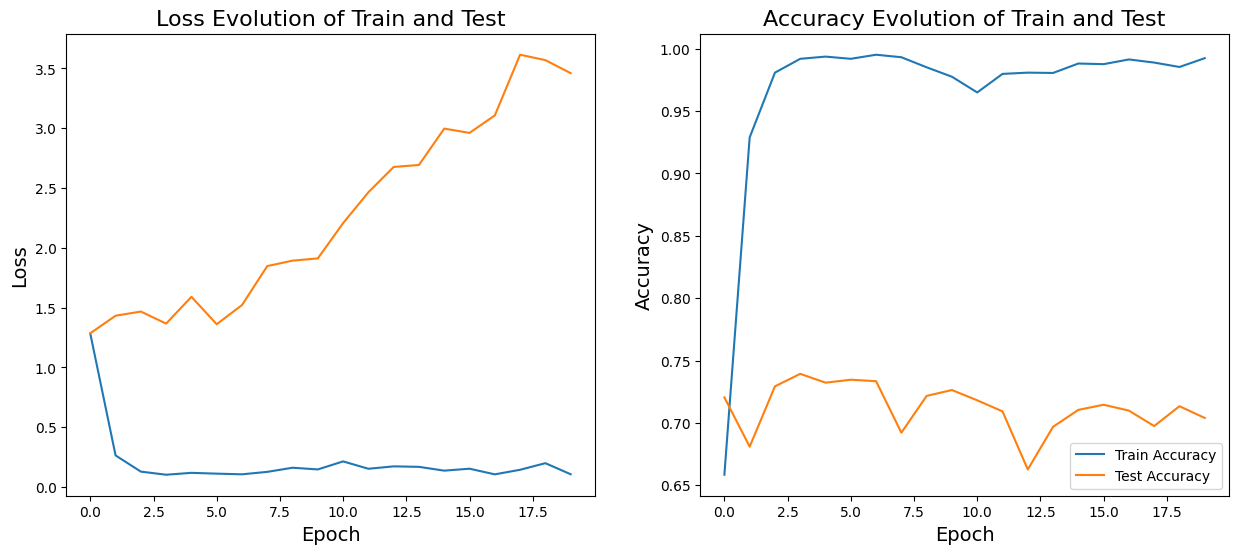

In [ ]:
# VGG-13 with finetuning
visualize_training_results(vgg_finetuned)

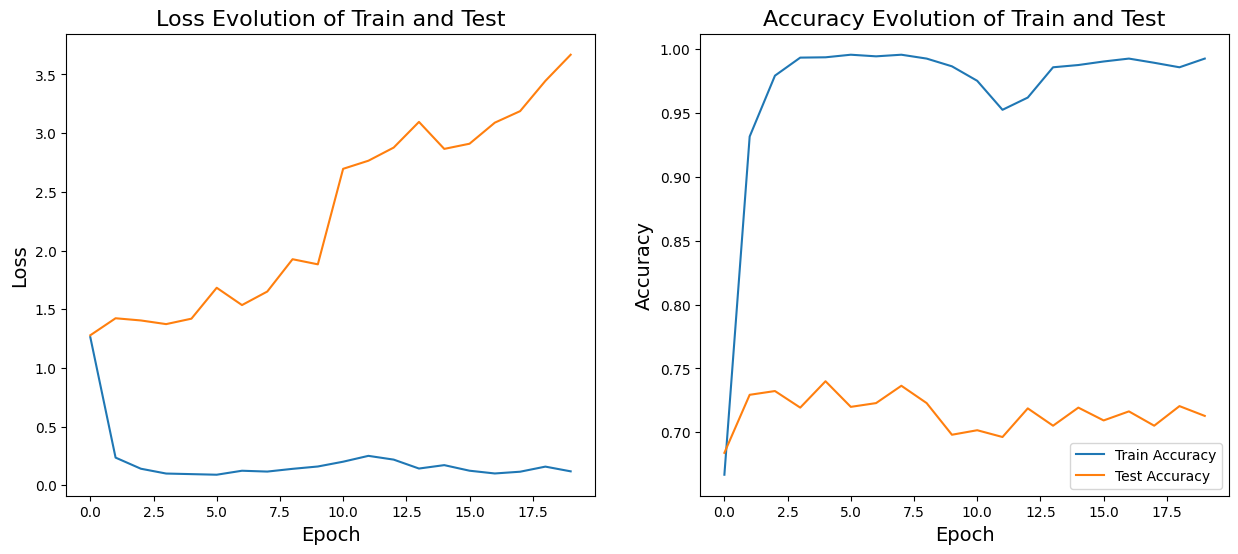

In [ ]:
# VGG-13 with frozen
visualize_training_results(vgg_frozen)

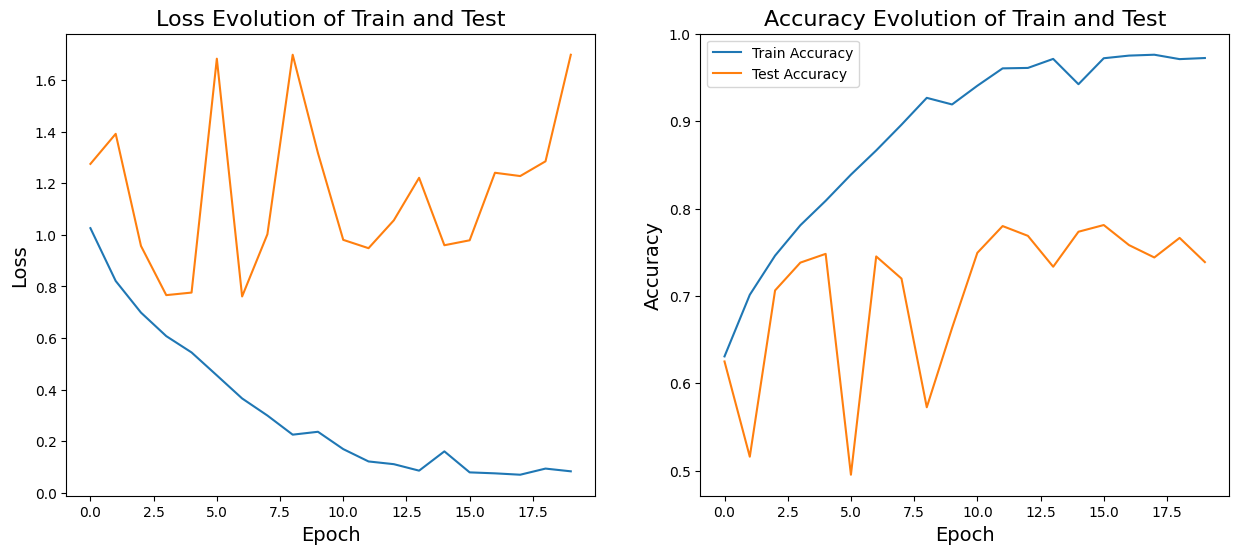

In [ ]:
# Resnet-18 with finetuning
visualize_training_results(resnet_finetuned)

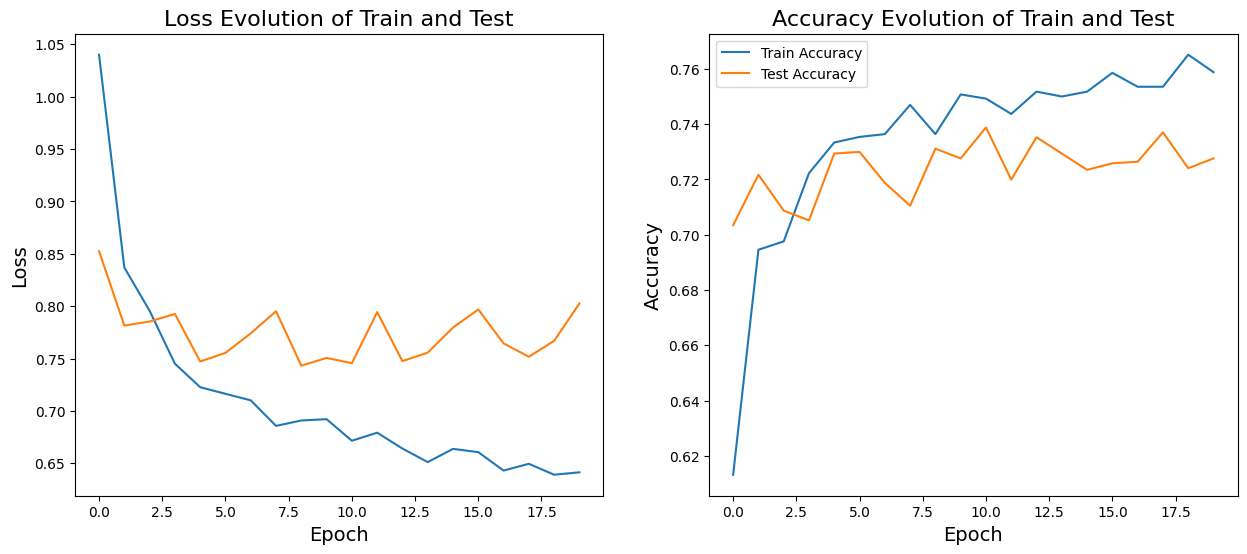

In [ ]:
# Resnet-18 with frozen
visualize_training_results(resnet_frozen)

Observation
In order to combat label imbalance, pretrained models were leveraged. These models were utilized both as feature extractors and as finetuned blocks. The results observed were as follows:

1. No serious difference in performance was observed when using the pretrained Resnet-18 model as feature extractor (with frozen weights) or as a finetuned block.

2. The pretrained VGG-13 model showed good performance when finetuned compare to when the weights were frozen, but was prone to overfitting.

3. ResNet-18 models showed slightly better performance when finetuned comapared to when weights were frozen.

4. VGG-13 models generally surpass the ResNet-18 models in magnitude, but ResNet-18 is better with respect to generalization error.

5. The image sizes had considerable impact on model speed and performance. Training with a size of 600 x 600 gave a slower, lesser-performing model than with a size of 224 x 224.

6. VGG-13 model is more prone to overfitting in generally, compare ResNet-18. This might be due to size difference between VGG-13(~ 500 MB) and ResNet-18 (~ 90 MB)

# Model Selection
Following on the observations above, ResNet-18 models may be selected over VGG-18 models. Reason for this choice are:
1. ResNet-18 model is much smaller than VGG-13 model. This means both training and inference would be faster
2. Consistency: As can be borne out by the visualization above, and since it has a smaller generalization error, Resnet-18 model is more consistent than the VGG-13 model

# Pre-Deployment (Simple Model Engineering)
Before we can deploy a model we need to save it to storage. We can either save the whole model (i.e model) or its properties and parameters (model.state_dict()). We can also optimise the model before saving. There are multiple ways to do this:
1. Script the model via torch.jit.script.
2. Trace the model via torch.jit.trace.

One any of these has been done, we can save the scripted/traced model using .save method.

Note: Before scripting or tracing model, ensure that the parameters do not required gradients.

# 06. Model Development
This will make use of TorchServe, a model serving (i.e. deployment) package with the Pytorch ecosystem. To deploy a model via torchserver, we need a model handler which will tell the torchserver server how to handle our model. It will contain 4 methods:
1. Initialize: Where are required utilities are initialize.
2. Preprocess: Where the data provided by the user are prepared before passed to the model.
3. Inference: Where the model prediction process can be configured.
4. Postprocess: Where the model predictions are processed as needed. eg., convering numbers to predicted classes

Note: Torchserve provided ready made handlers for this. We will design our custom handlers though



Torchserve has two main API ports which are of interest to us in this project:
1. Management API: Port 8081. This is the port via which the server can be configured and its behaviour managed.
2. Inference API: POrt 8080. This is the port via which the model returns prediction


# High-level Deployment Steps:
1. Register the model
2. Write the handler
3. Start the save and point it to the necessary inputs eg. registered model, model handler, etc.
4. Run inference

In [ ]:
# prompt: !mkdir artifacts

!mkdir artefacts
!mkdir artefacts/models


mkdir: cannot create directory ‘artefacts’: File exists
mkdir: cannot create directory ‘artefacts/models’: File exists


In [ ]:
selected_model = resnet_finetuned['model']

In [ ]:
for param in selected_model.parameters():
  param.requires_grad_(False)

In [ ]:
scripted_model = torch.jit.script(selected_model)

scripted_model.save("artefacts/models/resnet_frozen.ptt")

In [ ]:
dummy_input = torch.randn(1, 3, 224, 224).to(DEVICE) # BATCH_SIZE, NUM_CHANNELS, IMG_HEIGHT, IMG_WIDTH
trace_module = torch.jit.trace(selected_model, dummy_input)

trace_module.save("artefacts/models/resnet_frozen.ptt")

In [ ]:
# Model Deployment 1
# Below is our model handling script

In [1]:
%%writefile handler_scripted.py
# This writes the following code to a file named handler_scripted.py

import numpy as np
import torch
from ts.torch_handler_handler.image_classifier import ImageClassifier
# Importing necessary libraries: numpy for numerical operations, torch for PyTorch framework,
# ImageClassifier from TorchServe handler, which is the base class for image classification

from torch.profiler import ProfilerActivity
# This is for profiling activities during the model execution to track GPU and CPU usage

import torchvision.transforms as T
# Importing transforms module from torchvision for image transformations

from imageio import imread
# imread is used to read images into a NumPy array

class CassavaClassifier(ImageClassifier):
    # This defines a custom image classifier called CassavaClassifier, inheriting from ImageClassifier

    transform = T.Compose(
        [
            T.Resize((224, 224)), # Resizes images to 224x224 pixels
            T.Normalize(
                mean=[0.485, 0.456, 0.406], # Normalize the image using mean values
                std=[0.229, 0.224, 0.225]   # Normalize using standard deviation values
            )
        ]
    )
    # 'transform' defines the preprocessing steps to resize and normalize the input image data

    class_map = {
        "cbsd": 0,   # Mapping for the cassava brown streak disease (cbsd)
        "cbb": 1,    # Mapping for cassava bacterial blight (cbb)
        "cgm": 2,    # Mapping for cassava green mite (cgm)
        "cmd": 3,    # Mapping for cassava mosaic disease (cmd)
        "healthy": 4 # Mapping for healthy cassava leaves
    }
    # Dictionary that maps class names (e.g., "cbsd", "cbb") to their respective class indices (0, 1, 2, 3, 4)

    class_map = {v: k for k, v in class_map.items()}
    # Reverses the class_map dictionary to map from class indices (0, 1, etc.) to class names (cbsd, cbb, etc.)

    def __init__(self):
        super().__init__()
    # Constructor method that calls the constructor of the parent class ImageClassifier

    @torch.no_grad()
    def preprocess(self, data):
        # Preprocesses the input data before passing it to the model
        # @torch.no_grad() ensures no gradients are computed to save memory and computation power

        data = data[0]  # Extracts the first element from the data (usually the image itself)
        data = bytes(data["body"])  # Converts the image from byte stream to bytes

        data = imread(data)  # Reads the image into a NumPy array using imread
        data = torch.tensor(data, dtype=torch.float32)  # Converts the NumPy array to a PyTorch tensor

        data = data.permute(2, 0, 1)  # Rearranges dimensions from (height, width, channels) to (channels, height, width)
        data = self.transform(data).unsqueeze(0)  # Applies transformations (resize, normalize) and adds batch dimension

        return data.cuda()  # Sends the preprocessed data to the GPU

    @torch.no_grad()
    def postprocess(self, data):
        # Post-processes the output from the model to return human-readable class names

        class_indices = data.max(dim=-1).indices.cpu().numpy().tolist()
        # Gets the predicted class index with the highest value for each image in the batch

        class_names = [f"\nPredicted Class: {self.class_map[class_index]}\n" for class_index in class_indices]
        # Converts the class indices to class names using the class_map and formats them for output

        return class_names
    # Returns the predicted class names


Writing handler_scripted.py


# Recommendations based on Data Modelling and Model Evaluation Results
Based on our final observations from the training process, we can make some recommendations:
1. Training Time: We could spend more time training by increasing the number of eporchs. This results in better performance
2. Pretrained Models: We could try out other pretrained models. Keep in mind that a lot of them might be much bigger and take more time to train
3. Data Augmentation: Try out more image augmentations like random image rotation, random mutation of brightness, contrast, and hue of the image, and addition of random noise.
4. Hyperparametric Testing: Try out multiple different values for hyperparametric testing like the learning rate, beta, etcetara.
5. Normalization Parameters: The normalization mean and standard deviation used during data preparation might be suboptional.
6. Extra Model: The extra model added to the pretrained was a single nn.linear layer. Making the extra model more complex might result in overfitting, but also improve results.
7. Early Stopping: Some of the models had worse perormance as the training progressed. Early stopping can be used to arrest this situation.
8. Initialization Schemes: Try out multiple weight initialisation schemes. Examples include nn.init<method>, where options from method include:
- kaiming_normal_,
- uniform_,
- ones_, etcetra.

